In [1]:
import pandas as pd
import pyspark as spark
import seaborn as sns
import matplotlib.pyplot  as plt
import numpy as np
import os.path
from os import listdir
from os.path import isfile, join
import scipy.io as sio
from scipy.signal import find_peaks 
from bioinfokit.analys import stat
import math
import shelve

In [2]:
%run -i cmcf_functions.ipynb

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
sns.set(rc={'figure.figsize':(10,5)})
res = stat()
ordered = ["CM", "Condition Media", "CMCF" ,  "DCM"]

In [5]:
max_array_d6 = {}
tau_array_d6 = {}
lax_time_array_d6 = {}
up_array_d6 = {}
time_at_max_array_d6  = {}

## DAY 6

### CF

In [6]:
d6_val = "Condition Media" 
pathname = os.path.join(os.path.join(os.path.join('Full CMCF Data', 'CF'),"D6"),"Strain_Data")

onlyfiles = [f for f in listdir(pathname) if isfile(join(pathname, f))]
cfd6_datas = []

for i in range(len(onlyfiles)):
    cfd6 = sio.loadmat(os.path.join(pathname, onlyfiles[i]))
    cfd6_datas.append(cfd6)


In [7]:
data_len = len(cfd6_datas)
all_vals = {}
peaks_count = {}
peaks = {}
max_vals = {}
for i in range(len(cfd6_datas)):
    x = cfd6_datas[i]["E2"]
    num_counts = []
    #determine baseline through trial and error with given part of cell experiences no contraction
    val = .008
    #loop through each image
    for img in x.swapaxes(2,0).swapaxes(1,2) :
        thresh_val = thresh(img,val)
        num_counts.append(thresh_val)
    all_vals[i] = num_counts
    peaks[i], vals  = find_peaks(num_counts, prominence = .55, height = .5, width = 2)
    max_vals[i] = vals["peak_heights"]

In [8]:
max_dict = dict([ (k,pd.Series(v)) for k,v in max_vals.items() ])
max_df = pd.DataFrame(max_dict)
max_array_d6[d6_val] = np.concatenate(list(max_dict.values()))
peaks_count = {key: len(value) for key, value in peaks.items()}

In [9]:
#Relaxation Rate 
df_tau,tau_array_d6[d6_val] = funcToPlot(tau, all_vals, peaks_count, data_len, max_df)
#Relaxation Time
df_time_val, lax_time_array_d6[d6_val] = funcToPlot(timeToRest, all_vals, peaks_count, data_len, max_df)
#Contraction Rate
df_up_val, up_array_d6[d6_val] = funcToPlot(backTau, all_vals, peaks_count, data_len, max_df)
#Time at Max
df_time_max_val, time_at_max_array_d6[d6_val] = funcToPlot(atMax, all_vals, peaks_count, data_len, max_df)

In [10]:

# for i in range(len(cfd6_datas)):
   
#     x = cfd6_datas[i]["E2"]
    
#     num_counts = []
#     #determine baseline through trial and error with given part of cell experiences no contraction
#     val = .008
#     #loop through each image
#     for img in x.swapaxes(2,0).swapaxes(1,2) :
#         thresh_val = thresh(img,val)
#         num_counts.append(thresh_val)
#     df = pd.DataFrame(dict(x = np.arange(0,x.shape[2]), y = num_counts)) 
#     plt.figure()
#     g = sns.lineplot(data = df, y = "y", x= "x")
#     g.set_xticks(np.arange(0,275,10))
#     g.set_title(i)
  
  

### CM

In [11]:
d6_val = "CM" 
pathname = os.path.join(os.path.join(os.path.join('Full CMCF Data', 'CM'),"D6"),"Strain_Data")

onlyfiles = [f for f in listdir(pathname) if isfile(join(pathname, f))]
cmd6_datas = []

for i in range(len(onlyfiles)):
    cmd6 = sio.loadmat(os.path.join(pathname, onlyfiles[i]))
    cmd6_datas.append(cmd6)

In [12]:
pathname

'Full CMCF Data\\CM\\D6\\Strain_Data'

In [13]:
data_len = len(cmd6_datas)
all_vals = {}
peaks_count = {}
peaks = {}
max_vals = {}
for i in range(len(cmd6_datas)):
    x = cmd6_datas[i]["E2"]
    num_counts = []
    #determine baseline through trial and error with given part of cell experiences no contraction
    val = .008
    #loop through each image
    for img in x.swapaxes(2,0).swapaxes(1,2) :
        thresh_val = thresh(img,val)
        num_counts.append(thresh_val)
    all_vals[i] = num_counts
    peaks[i], vals  = find_peaks(num_counts, prominence = .55, height = .5, width = 2)
    max_vals[i] = vals["peak_heights"]

In [14]:
max_dict = dict([ (k,pd.Series(v)) for k,v in max_vals.items() ])
max_df = pd.DataFrame(max_dict)
max_array_d6[d6_val] = np.concatenate(list(max_dict.values()))
peaks_count = {key: len(value) for key, value in peaks.items()}

In [15]:
#Relaxation Rate 
df_tau,tau_array_d6[d6_val] = funcToPlot(tau, all_vals, peaks_count, data_len, max_df)
#Relaxation Time
df_time_val, lax_time_array_d6[d6_val] = funcToPlot(timeToRest, all_vals, peaks_count, data_len, max_df)
#Contraction Rate
df_up_val, up_array_d6[d6_val] = funcToPlot(backTau, all_vals, peaks_count, data_len, max_df)
#Time at Max
df_time_max_val, time_at_max_array_d6[d6_val] = funcToPlot(atMax, all_vals, peaks_count, data_len, max_df)

<ipython-input-2-fa06b561dfcd>:38: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  f_dict = dict([ (k,pd.Series(v)) for k,v in e_dict.items() ])


In [16]:
time_at_max_array_d6[d6_val] = time_at_max_array_d6[d6_val][time_at_max_array_d6[d6_val] < 60]

In [17]:
# for i in range(len(cmd6_datas)):
   
#     x = cmd6_datas[i]["E2"]
    
#     num_counts = []
#     #determine baseline through trial and error with given part of cell experiences no contraction
#     val = .008
#     #loop through each image
#     for img in x.swapaxes(2,0).swapaxes(1,2) :
#         thresh_val = thresh(img,val)
#         num_counts.append(thresh_val)
#     df = pd.DataFrame(dict(x = np.arange(0,x.shape[2]), y = num_counts)) 
#     plt.figure()
#     g = sns.lineplot(data = df, y = "y", x= "x")
#     g.set_xticks(np.arange(0,300,10))
#     g.set_title(i)

### CMCF

In [18]:
d6_val = "CMCF" 
pathname = os.path.join(os.path.join(os.path.join('Full CMCF Data', 'CMCF'),"D6"),"Strain_Data")

onlyfiles = [f for f in listdir(pathname) if isfile(join(pathname, f))]
cmcfd6_datas = []

for i in range(len(onlyfiles)):
    cmcfd6 = sio.loadmat(os.path.join(pathname, onlyfiles[i]))
    cmcfd6_datas.append(cmcfd6)

In [19]:
data_len = len(cmcfd6_datas)
all_vals = {}
peaks_count = {}
peaks = {}
max_vals = {}
for i in range(len(cmcfd6_datas)):
    x = cmcfd6_datas[i]["E2"]
    num_counts = []
    #determine baseline through trial and error with given part of cell experiences no contraction
    val = .008
    #loop through each image
    for img in x.swapaxes(2,0).swapaxes(1,2) :
        thresh_val = thresh(img,val)
        num_counts.append(thresh_val)
    all_vals[i] = num_counts
    peaks[i], vals  = find_peaks(num_counts, prominence = .5, height = .5, width = 2)
    max_vals[i] = vals["peak_heights"]

In [20]:
max_dict = dict([ (k,pd.Series(v)) for k,v in max_vals.items() ])
max_df = pd.DataFrame(max_dict)
max_array_d6[d6_val] = np.concatenate(list(max_dict.values()))
peaks_count = {key: len(value) for key, value in peaks.items()}

In [21]:
#Relaxation Rate 
df_tau,tau_array_d6[d6_val] = funcToPlot(tau, all_vals, peaks_count, data_len, max_df)
#Relaxation Time
df_time_val, lax_time_array_d6[d6_val] = funcToPlot(timeToRest, all_vals, peaks_count, data_len, max_df)
#Contraction Rate
df_up_val, up_array_d6[d6_val] = funcToPlot(backTau, all_vals, peaks_count, data_len, max_df)
#Time at Max
df_time_max_val, time_at_max_array_d6[d6_val] = funcToPlot(atMax, all_vals, peaks_count, data_len, max_df)

In [22]:

# for i in range(len(cmcfd6_datas)):
   
#     x = cmcfd6_datas[i]["E2"]
    
#     num_counts = []
#     #determine baseline through trial and error with given part of cell experiences no contraction
#     val = .008
#     #loop through each image
#     for img in x.swapaxes(2,0).swapaxes(1,2) :
#         thresh_val = thresh(img,val)
#         num_counts.append(thresh_val)
#     df = pd.DataFrame(dict(x = np.arange(0,x.shape[2]), y = num_counts)) 
#     plt.figure()
#     g = sns.lineplot(data = df, y = "y", x= "x")
#     g.set_xticks(np.arange(0,150,10))
#     g.set_title(i)

### DCM

In [23]:
d6_val = "DCM" 
pathname = os.path.join(os.path.join(os.path.join('Full CMCF Data', 'DCM'),"D6"),"Strain_Data")

onlyfiles = [f for f in listdir(pathname) if isfile(join(pathname, f))]
dcmd6_datas = []

for i in range(len(onlyfiles)):
    dcmd6 = sio.loadmat(os.path.join(pathname, onlyfiles[i]))
    dcmd6_datas.append(dcmd6)

In [24]:
data_len = len(dcmd6_datas)
all_vals = {}
peaks_count = {}
peaks = {}
max_vals = {}
for i in range(len(dcmd6_datas)):
    x = dcmd6_datas[i]["E2"]
    num_counts = []
    #determine baseline through trial and error with given part of cell experiences no contraction
    val = .008
    #loop through each image
    for img in x.swapaxes(2,0).swapaxes(1,2) :
        thresh_val = thresh(img,val)
        num_counts.append(thresh_val)
    all_vals[i] = num_counts
    peaks[i], vals  = find_peaks(num_counts, prominence = .5, height = .5, width = 2)
    max_vals[i] = vals["peak_heights"]

In [25]:
max_dict = dict([ (k,pd.Series(v)) for k,v in max_vals.items() ])
max_df = pd.DataFrame(max_dict)
max_array_d6[d6_val] = np.concatenate(list(max_dict.values()))
peaks_count = {key: len(value) for key, value in peaks.items()}

In [26]:
#Relaxation Rate 
df_tau,tau_array_d6[d6_val] = funcToPlot(tau, all_vals, peaks_count, data_len, max_df)
#Relaxation Time
df_time_val, lax_time_array_d6[d6_val] = funcToPlot(timeToRest, all_vals, peaks_count, data_len, max_df)
#Contraction Rate
df_up_val, up_array_d6[d6_val] = funcToPlot(backTau, all_vals, peaks_count, data_len, max_df)
#Time at Max
df_time_max_val, time_at_max_array_d6[d6_val] = funcToPlot(atMax, all_vals, peaks_count, data_len, max_df)

In [27]:

# for i in range(len(dcmd6_datas)):
   
#     x = dcmd6_datas[i]["E2"]
    
#     num_counts = []
#     #determine baseline through trial and error with given part of cell experiences no contraction
#     val = .008
#     #loop through each image
#     for img in x.swapaxes(2,0).swapaxes(1,2) :
#         thresh_val = thresh(img,val)
#         num_counts.append(thresh_val)
#     df = pd.DataFrame(dict(x = np.arange(0,x.shape[2]), y = num_counts)) 
#     plt.figure()
#     g = sns.lineplot(data = df, y = "y", x= "x")
#     g.set_xticks(np.arange(0,150,10))
#     g.set_title(i)

### Visuals

In [28]:
%run -i cmcf_functions.ipynb

Text(0.5, 1.0, 'Highest Percentage of Cells Contracting in Each Strain on Day 6')

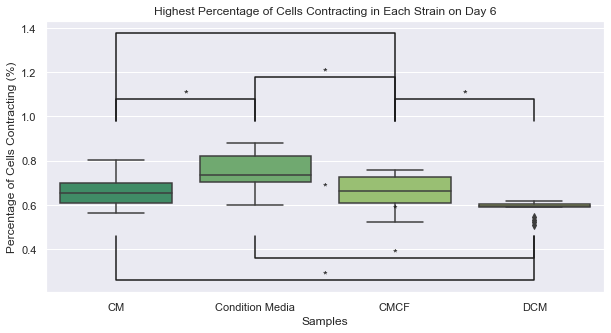

In [29]:
g = plot_box(max_array_d6, 0)
g.set_title("Highest Percentage of Cells Contracting in Each Strain on Day 6")

In [30]:
# tau_array_d6["CM"] = tau_array_d6["CM"][tau_array_d6["CM"] < .0068]
# tau_array_d6["CMCF"] = tau_array_d6["CMCF"][tau_array_d6["CMCF"] < .01]

Text(0.5, 1.0, 'Relaxation Rate of Cells in Each Strain on Day 6 ')

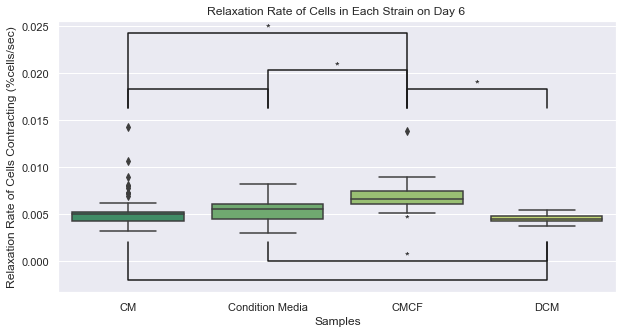

In [31]:
g = plot_box(tau_array_d6,1)
g.set_title("Relaxation Rate of Cells in Each Strain on Day 6 ")

Text(0.5, 1.0, 'Time of Cells Relaxing in Each Strain on Day 6')

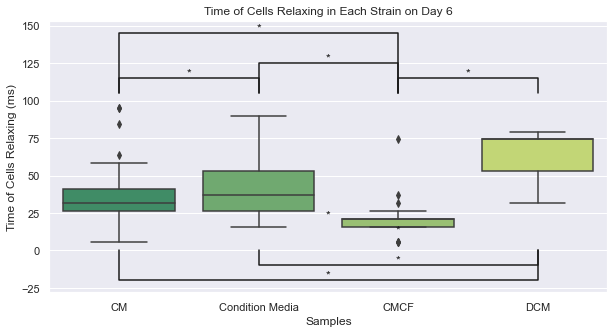

In [32]:
#lax array
g = plot_box(lax_time_array_d6,2)
g.set_title("Time of Cells Relaxing in Each Strain on Day 6")

Text(0.5, 1.0, 'Contraction Rate in Each Strain on Day 6')

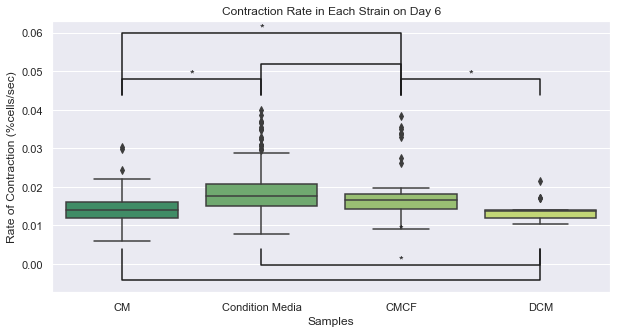

In [33]:
g = plot_box(up_array_d6,3)
g.set_title("Contraction Rate in Each Strain on Day 6")

Text(0.5, 1.0, 'Time of Contraction in Each Strain on Day 6')

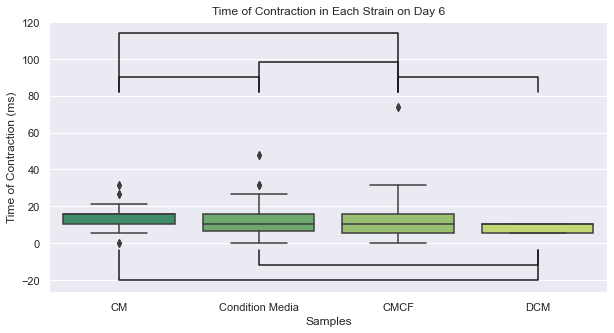

In [34]:
g = plot_box(time_at_max_array_d6,4)
g.set_title("Time of Contraction in Each Strain on Day 6")

In [35]:
## save each array into file and then add to full data to get grouped values

In [36]:
# file to be used
shelf = shelve.open("day6.shlf")

# serializing
shelf["max_array_d6"] = max_array_d6
shelf["lax_time_array_d6"] = lax_time_array_d6
shelf["tau_array_d6"] = tau_array_d6
shelf["up_array_d6"] = up_array_d6
shelf["time_at_max_array_d6"] = time_at_max_array_d6

shelf.close() # you must close the shelve file!!!

In [42]:
#Pad array to convert to excel

max_df = array_to_df(max_array_d6)
lax_df = array_to_df(lax_time_array_d6)
tau_df = array_to_df(tau_array_d6)
up_df = array_to_df(up_array_d6)
time_df = array_to_df(time_at_max_array_d6)
with pd.ExcelWriter('day6.xlsx') as writer:  
    max_df.to_excel(writer, sheet_name = "max")
    lax_df.to_excel(writer, sheet_name = "lax")
    tau_df.to_excel(writer, sheet_name = "tau")
    up_df.to_excel(writer, sheet_name = "up")
    time_df.to_excel(writer, sheet_name = "time")
